In [1]:
# !pip install pycryptodome==3.15.0
# !pip install PyPDF2

In [2]:
# !python -m pip install spacy
# !python -m spacy download pt

In [1]:
import nltk

In [2]:
import numpy as np

In [3]:
from nltk.util import ngrams

In [4]:
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn import linear_model

In [8]:
import string

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from unidecode import unidecode

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
import matplotlib.pyplot as plt

In [12]:
perguntas = [
    'Como esse COIL afetou sua consciência global?',
    'Que novas perspectivas você descobriu durante sua experiência no COIL?',
    'Que pontos em comum você notou durante sua experiência com o COIL?',
    'Você recomendaria uma experiência COIL a um amigo? Por que sim ou por que não?',
    'O que você diria que os alunos precisam fazer se quiserem ter uma experiência COIL bem-sucedida?',
    'Se você fosse fazer o COIL com colegas internacionais novamente, o que faria de diferente?',
    'O que tornou a experiência COIL única ou especial?',
    'O que você aprendeu sobre seus colegas internacionais? O que você aprendeu sobre si mesmo?',
    'De modo geral, qual foi o momento de aprendizado mais interessante e útil para você em suas atividades de colaboração com colegas internacionais?',
    'O que você aprendeu com o COIL que pode ajudá-lo em outras áreas de sua vida?',
    'O que você aprendeu com a apresentação dos seus colegas de equipe do Brasil no Padlet?',
    'Seus aprendizados do'
]

In [14]:
print(f"Tamanho Perguntas: {len(perguntas)}")

Tamanho Perguntas: 12


In [29]:
# Carregar a base de dados com perguntas e respostas
df = pd.read_csv("../../../dados/pesquisa-sol/reflexoes-coil.csv", encoding='utf8', delimiter=";", quotechar='"', 
    names=['id', 'hora_inicio', 'hora_conclusao', 'email', 'nome', 'ult_mod', 'nome_entrevistado', 'q1', 'q2', 'q3', 'q4', 
           'q5', 'q6', 'q7', 'q8', 'q9', 'q10'], header=1)
df.describe()

,id,ult_mod
count,14.0000,0.0
mean,8.5000,NaN
std,4.1833,NaN
min,2.0000,NaN
25%,5.2500,NaN
50%,8.5000,NaN
75%,11.7500,NaN
max,15.0000,NaN


In [33]:
df

,id,nome_entrevistado,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,2,AUGUSTIN WONG,O Coil influenciou a minha consciência global ...,Uma nova perspectiva que descobri durante a mi...,Os pontos comuns que notei durante a minha exp...,Eu recomendaria a experiência COIL a um amigo ...,Os alunos precisam de fazer algumas coisas se ...,"Se eu fosse usar o COIL novamente, o que eu fa...",A experiência no COIL foi única porque pude ap...,Aprendi muito sobre mim mesmo e sobre meus col...,"De modo geral, o momento de aprendizado mais i...","Posso tirar muitas lições do COIL, como, por e..."
1,3,HARMANPREET KAUR,A Coil ajudou-me a aumentar a consciência glob...,O COIL introduziu-me a uma nova perspectiva so...,"Apesar das nossas diferenças culturais, reconh...",Recomendo vivamente a experiência do COIL a um...,"Para ter uma boa experiência COIL, os alunos d...",Se eu fosse ao COIL com colegas internacionais...,A experiência do COIL foi única porque possibi...,O COIL me proporcionou insights inestimáveis s...,O módulo nos ajudou a compartilhar o valor do ...,A experiência do COIL aumentou a minha consciê...
2,4,ISAYA LORJITSAARD,"Durante um semestre, fiz parte do COIL e isso ...",Aprendi novos pontos de vista com a minha expe...,"Através do trabalho de grupo, reparei em algun...",Absolutamente recomendável. Do meu ponto de vi...,Ter uma mente aberta. O conhecimento está em t...,"Eu aprenderia o idioma deles, provavelmente ap...","Do meu ponto de vista, acho que a experiência ...","Logo no início do curso, com a introdução do C...","Como mencionei na resposta anterior, um dos mo...",O COIL melhorou significativamente minha habil...
3,5,JAMA MAHAMUD,"Como aluno, antes desse curso, eu nunca tinha ...",Essa foi uma experiência excelente e produtiva...,A partir das postagens no Padlet e de outras c...,"Desde o início da história da humanidade, a gl...",Colaborar com seus colegas de classe e profess...,A maneira como os professores e ambas as insti...,Acredito que nosso curso se baseou nas asas im...,Aprendi muitos conceitos sobre comportamentos ...,Estar fora de sua cultura e pensamentos e apre...,Entendo os conceitos de organizações e como eu...
4,6,JAMES KAWAN,"Neste semestre, participar do COIL com meus am...",Participar do COIL com colegas de classe brasi...,Consegui encontrar pontos em comum com meus co...,"Além de estar alinhado academicamente, o progr...",Os alunos devem cooperar e ter habilidades de ...,Se a oportunidade de colaborar com colegas glo...,"Estávamos separados geograficamente, mas a exp...",As conversas que tivemos durante o COIL fluíra...,Perceber que a diversidade abrange uma série d...,Minha experiência no COIL me proporcionou habi...
5,7,JOLINA CLARIDAD,Participar da experiência do COIL me ajudou a ...,"A experiência no COIL abriu meus olhos, aprese...","Ao longo da minha experiência no COIL, surgira...","Sem dúvida, eu recomendaria uma experiência CO...","Para que a experiência COIL seja bem-sucedida,...",Refletindo sobre minha experiência anterior no...,A singularidade da experiência COIL decorre da...,O envolvimento com meus colegas internacionais...,A experiência de aprendizado mais interessante...,A experiência no COIL destacou áreas da minha ...
6,8,JOSHUA ROBINSON,"Na minha vida, eu nasci e cresci no Canadá, o ...",Tenho novas perspectivas a partir da minha exp...,Com a minha falta de conhecimento de Pessoas a...,Eu tive uma grande experiência com a equipe de...,"A partir da minha experiência com o Coil, foi ...",Uma vez que esta foi a minha primeira experiên...,"A experiência da bobina foi única para mim, eu...",Eu aprendi muitas coisas com esta experiência ...,O momento de aprendizagem mais interessante e ...,A maior tirar da minha experiência de bobina s...
7,9,JUGAADH SINGH MANOCHA,A participação no COIL aumentou significativam...,"O COIL tem sido uma jornada de descobertas, re...","Apesar de nossas diversas origens culturais, o...","Sem hesitar, eu recomendaria de todo o coração...",O sucesso em uma experiência COIL d

## Preparo do data set

In [31]:
# Remover colunas inúteis
df.drop(
    columns = ['hora_inicio', 'hora_conclusao', 'email', 'nome', 'ult_mod'],
    inplace = True
)

In [32]:
# Remover linhas com conteudo N/A
df.dropna(inplace = True)

### Carregar dicionario de palavras positivas e negativas

In [37]:
df_words = pd.read_csv("../../../dados/pesquisa-sol/lexico_v3.0.txt", encoding='utf8', delimiter=",", 
                       header=0, names=['symbol', 'morfologia', 'polaridade', 'fator'])

In [59]:
item = df_words.loc[df_words['symbol'] == 'feio']

In [71]:
def polaridade_palavra( palavra ):
    global df_words
    item = df_words.loc[df_words['symbol'] == palavra]
    if len(item) == 0:
        return 0
    else:
        return item['polaridade'].values[0]
    

In [77]:
print("Legal: ", polaridade_palavra('legal'))
print("Chata: ", polaridade_palavra('chata'))
print("Neutro: ", polaridade_palavra('neutro'))

Legal:  1
Chata:  -1
Neutro:  0


### Preparo do texto text_pt

#### Funções para o tratamento de texto

In [78]:
# Função para preparar as palavras do texto
def preparar_texto( texto ):
    # Converter em minusculo
    texto_limpo = texto.lower()
    # Remover pontuação e caracteres especiais
    translator = str.maketrans('\n\r\t', '   ', string.punctuation)
    texto_limpo = texto_limpo.translate(translator)
    # Remover os acentos
    texto_limpo = unidecode(texto_limpo)
    return texto_limpo

In [79]:
# Remover Stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')
def remove_stopwords( texto ):
    tokens = []
    for token in nltk.tokenize.word_tokenize(texto, language='portuguese'):
        if token not in stopwords:
            tokens.append(token)
    return " ".join(tokens)

In [80]:
len(stopwords)

207

In [81]:
# Lematização
def lematizar( texto ): 
    doc = nlp(texto)
    doc_lemma = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
    return " ".join(doc_lemma)

In [82]:
# Stemming
stemmer = nltk.RSLPStemmer()
def stemmer_text( texto ):
    if isinstance(texto, str):
        lista_palavras = texto.split(" ")
        nova_lista = []
        for palavra in lista_palavras:
            stemmed = stemmer.stem( palavra )
            nova_lista.append(stemmed)
        return " ".join(nova_lista)
    else:
        return texto

In [83]:
def transformar_texto( texto ):
    texto_limpo = preparar_texto( texto )
    return texto_limpo
    # texto_sem_stopwords = remove_stopwords(texto_limpo)
    # texto_stemmed = stemmer_text(texto_sem_stopwords)
    # return texto_stemmed

#### Prepara o texto e coloca em uma variavel separada

In [84]:
count = 0
def invocar_transformar_texto( texto ):
    global count
    count += 1
    if count % 1000 == 0:
        print(f"Analisando linha: {count}")
    return transformar_texto( texto )

texto_preparado = df['q1'].apply(invocar_transformar_texto)

In [88]:
def polaridade_texto( texto ):
    polaridade = 0
    tokens = texto.split(" ")
    for token in tokens:
        polaridade += polaridade_palavra( token )
    return polaridade

In [90]:
df['q1_sentiment'] = texto_preparado.apply(polaridade_texto)

In [91]:
df['q1_sentiment']

0     10
1      3
2      1
3      3
4     12
5      6
6      5
7      5
8      7
10    16
11     8
12     6
13     6
Name: q1_sentiment, dtype: int64

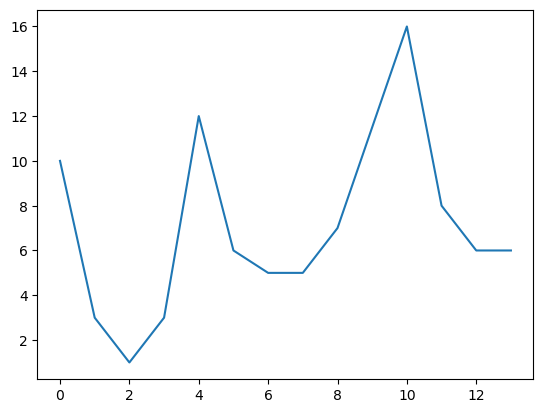

In [94]:
plt.plot( df['q1_sentiment'])

In [86]:
texto_preparado

0     o coil influenciou a minha consciencia global ...
1     a coil ajudoume a aumentar a consciencia globa...
2     durante um semestre fiz parte do coil e isso a...
3     como aluno antes desse curso eu nunca tinha ti...
4     neste semestre participar do coil com meus ami...
5     participar da experiencia do coil me ajudou a ...
6     na minha vida eu nasci e cresci no canada o ma...
7     a participacao no coil aumentou significativam...
8     como participante do coil a experiencia amplio...
10    online international learning coil que foi uma...
11    estar envolvido no coil ou aprendizagem intern...
12    coil significa collaborative online internatio...
13    esse coil realmente abriu meus olhos para o qu...
Name: q1, dtype: object

### Criar o dicionario e o Bag of Words

In [98]:
polaridade_texto("tive a experiência mais horrível da minha excelente vida")

0

In [29]:
# # Criar o bag_of_words com base no CountVectorizer
# vetorizador = CountVectorizer(max_features=100, lowercase=False)
# bag_of_words = vetorizador.fit_transform(texto_preparado)
# bag_of_words.shape    # Verifica o formato da Matriz

In [30]:
# # Criar o bag_of_words com base no TfidfVectorizer usando NGram 3
# vetorizador = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1, 3))
# bag_of_words = vetorizador.fit_transform(texto_preparado)
# bag_of_words.shape

In [31]:
# Criar o bag_of_words com base no TfidfVectorizer
vetorizador = TfidfVectorizer(lowercase=False, max_features=2000)
bag_of_words = vetorizador.fit_transform(texto_preparado)
bag_of_words.shape

(49459, 2000)

In [32]:
dicionario = vetorizador.get_feature_names_out()

In [33]:
bow = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=dicionario)

In [34]:
train, test, train_class, test_class = train_test_split(bow, 
                                                        df["sentiment_value"], 
                                                        random_state = 100)

In [35]:
reg_logistica = LogisticRegression()
reg_logistica.fit(train, train_class)
acuracia = reg_logistica.score(test, test_class)

In [36]:
acuracia

0.874646178730287

# Acuracias
#### Sem tratamento do texto ==> 0.7013344116457744
#### Colocando as palavras em minusculo ==> 0.7107966033158107
#### Remover os caracteres especiais ==> 0.7273756570966438
#### Remover os acentos ==> 0.7272139102304893
#### Remover as stopwords ==> 0.7199353012535382
#### Remover stopwords e aplicar raiz do texto (stemm) ==> 0.7532551556813587
#### Aplicando o TF_ID ao inves da contagem de palavras ==> 0.7553578649413668
#### Aplicando NGRAM (1,3) ==> 0.7553578649413668
#### Aplicando TF_ID e MAX_Features = 200 ==> 0.7955519611807521
#### Aplicando TF_ID e MAX_Features = 300 ==> 0.8188435099069955 
#### Aplicando TF_ID e MAX_Features = 500 ==> 0.8418924383340073
#### Aplicando TF_ID e MAX_Features = 1000 ==> 0.8639708855640922
#### Aplicando TF_ID e MAX_Features = 2000 ==> 0.8760210270926001


In [37]:
# Tratar as respostas
respostas_preparadas = np.array([invocar_transformar_texto(r) for r in respostas])

In [38]:
respostas_preparadas

array([' o coil abriu meus olhos para o quanto os alunos brasileiros sao otimos desde o inicio fiquei agradavelmente surpreso com a qualidade do ingles de todos porque eu estava prevendo que haveria um desafio na comunicacao supondo que os brasileiros geralmente usam o portugues como idioma principal eles me provaram que seu nivel de ingles e tao bom quanto o de qualquer falante nativo de ingles',
       ' depois de conhecer todos por meio do padlet adoro o fato de que muitos de nos viemos de diferentes partes do mundo passando por diferentes fases da vida com nossos proprios objetivos e sonhos e ainda assim nos cruzamos embora eu nao conheca todos pessoalmente e bom conhecer as pessoas nas fotos por meio de suas palavras ate mesmo os detalhes mais simples como seus programasfilmes favoritos despertaram meu interesse em pesquisalos',
       ' os pontos em comum que notei sao que todos nos gostamos de sair e compartilhamos hobbies semelhantes como assistir a programas da netflix dancar 

In [39]:
vetorizador = TfidfVectorizer(lowercase=False, max_features=2000, vocabulary=dicionario)
bag_of_words_respostas = vetorizador.fit_transform(respostas_preparadas)
bag_of_words_respostas.shape

(12, 2000)

In [40]:
reg_logistica.predict(bag_of_words_respostas)

D:\usr\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [41]:
# i = 0
# print("Linhas size: ", len(linhas))
# while i < len(linhas):
#     linha = linhas[i].lower()
#     linha_tokens = nltk.tokenize.word_tokenize(linha, language='portuguese')
#     linha_tokens_limpos = remove_stop_words(linha_tokens)
#     i += 1
#     if linha_tokens_limpos is None or len(linha_tokens_limpos) < 3:
#         continue
#     linha_ngrams = ngrams(linha_tokens_limpos, 3)
#     linha_points = 0
#     for pergunta in perguntas:
#         pergunta_tokens = nltk.tokenize.word_tokenize(pergunta, language='portuguese')
#         pergunta_no_stopwords = remove_stop_words(pergunta_tokens)
#         for ngram_tuple in linha_ngrams: 
#             ngram_tupla_texto = " ".join(ngram_tuple)
#             if ngram_tupla_texto in pergunta.lower():
#                 linha_points += 1
# #                 print("Pontos: ", linha_points)
# #                 print("Pergunta: ", pergunta)
# #                 print("Linha: ", linha)
# #                 print("NGram_Tupla: ", ngram_tupla_texto)
#         if linha_points > 3: 
#             print("Linha: ", linha)
#             print("Corresponde a pergunta: ", pergunta.lower())

    